In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('apple_products.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [4]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [5]:
df.describe(include ="object")

,Product Name,Product URL,Brand,Upc,Ram
count,62,62,62,62,62
unique,62,62,1,62,4
top,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,MOBEXRGV7EHHTGUH,4 GB
freq,1,1,62,1,29


In [6]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

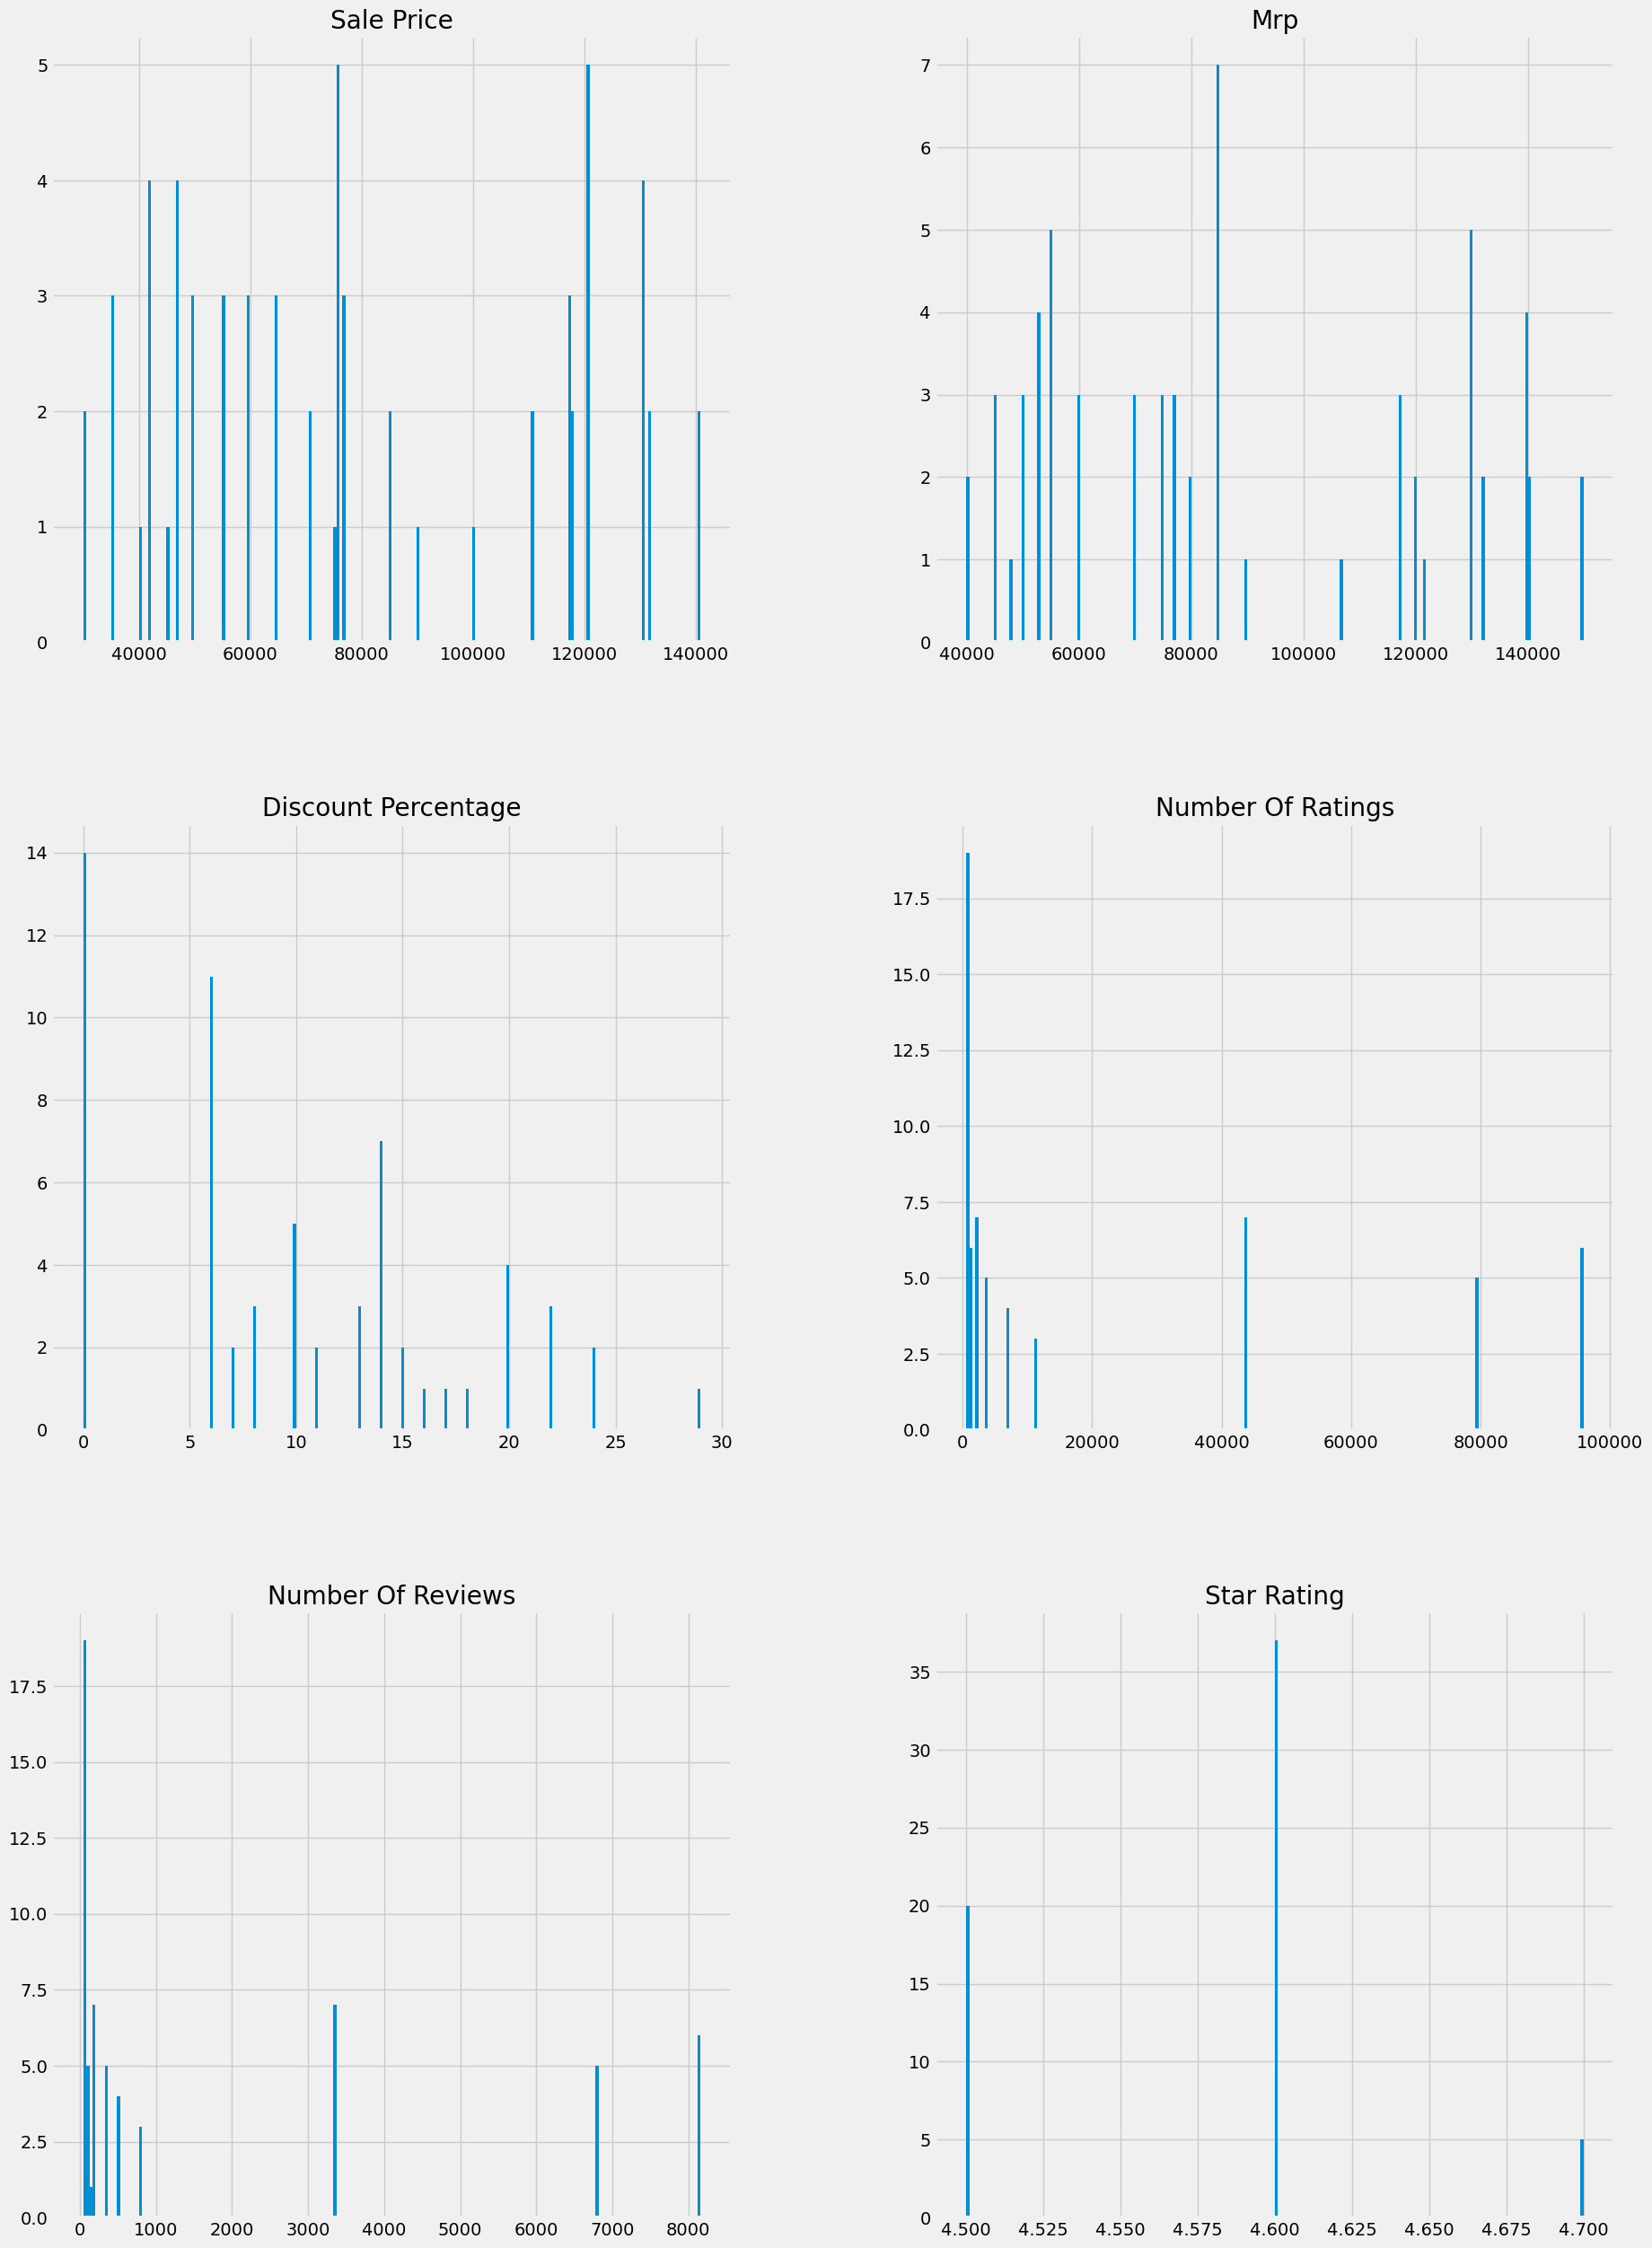

In [7]:
df.hist(bins=200, figsize=(20,30))
plt.show()

In [9]:
cat_col = []
num_col = []
for i in df:
    if df[i].dtypes == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print("obj : " ,cat_col)
print("num : " ,num_col)


obj :  ['Product Name', 'Product URL', 'Brand', 'Upc', 'Ram']
num :  ['Sale Price', 'Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating']


In [10]:
for i in cat_col:
    print(f"unique values in {i} is : {df[i].unique()}")

unique values in Product Name is : ['APPLE iPhone 8 Plus (Gold, 64 GB)'
 'APPLE iPhone 8 Plus (Space Grey, 256 GB)'
 'APPLE iPhone 8 Plus (Silver, 256 GB)' 'APPLE iPhone 8 (Silver, 256 GB)'
 'APPLE iPhone 8 (Gold, 256 GB)' 'APPLE iPhone 8 Plus (Silver, 64 GB)'
 'APPLE iPhone 8 Plus (Space Grey, 64 GB)'
 'APPLE iPhone 8 (Space Grey, 256 GB)'
 'APPLE iPhone XS Max (Silver, 64 GB)'
 'Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Black, 64 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Coral, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Black, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (White, 128 GB) (Includes EarPods, Power Adapter)'
 'APPLE iPhone 11 Pro Max (Gold, 256 GB)'
 'APPLE iPhone 11 Pro Max (Gold, 64 GB)'
 'APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)'
 'APPLE iPhone 11 Pro Max (Space Grey, 64 GB)'
 'APPLE iPhone 11 Pro (Midnight Green, 64 GB)'
 'APPLE iPhone 11 Pro (Space Grey, 512

In [11]:
for i in cat_col:
    print(f"count values in {i} is : {df.value_counts(i)}")

count values in Product Name is : Product Name
APPLE iPhone 11 (Black, 128 GB)                                      1
APPLE iPhone 8 Plus (Silver, 256 GB)                                 1
APPLE iPhone 12 Pro (Silver, 512 GB)                                 1
APPLE iPhone 12 Pro Max (Gold, 128 GB)                               1
APPLE iPhone 12 Pro Max (Gold, 256 GB)                               1
                                                                    ..
APPLE iPhone 12 Mini (Blue, 128 GB)                                  1
APPLE iPhone 12 Mini (Red, 64 GB)                                    1
APPLE iPhone 12 Mini (White, 128 GB)                                 1
APPLE iPhone 12 Mini (White, 64 GB)                                  1
Apple iPhone XR (White, 128 GB) (Includes EarPods, Power Adapter)    1
Length: 62, dtype: int64
count values in Product URL is : Product URL
https://www.flipkart.com/apple-iphone-11-black-128-gb/p/itm8244e8d955aba?pid=MOBFWQ6BKRYBP5X8         

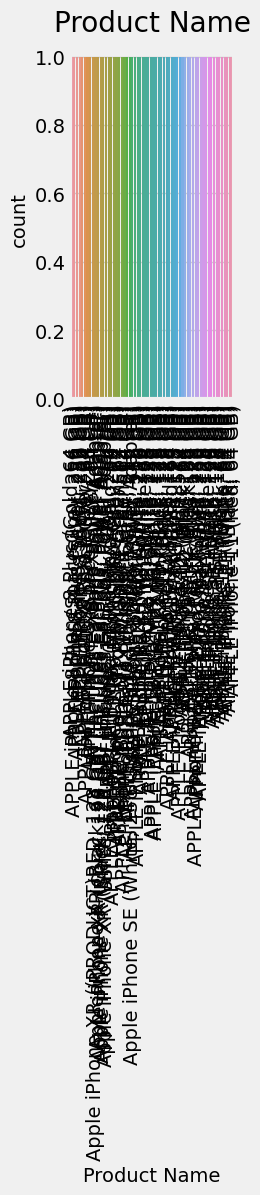

C:\Users\POP\AppData\Local\Temp\ipykernel_14140\1569940202.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


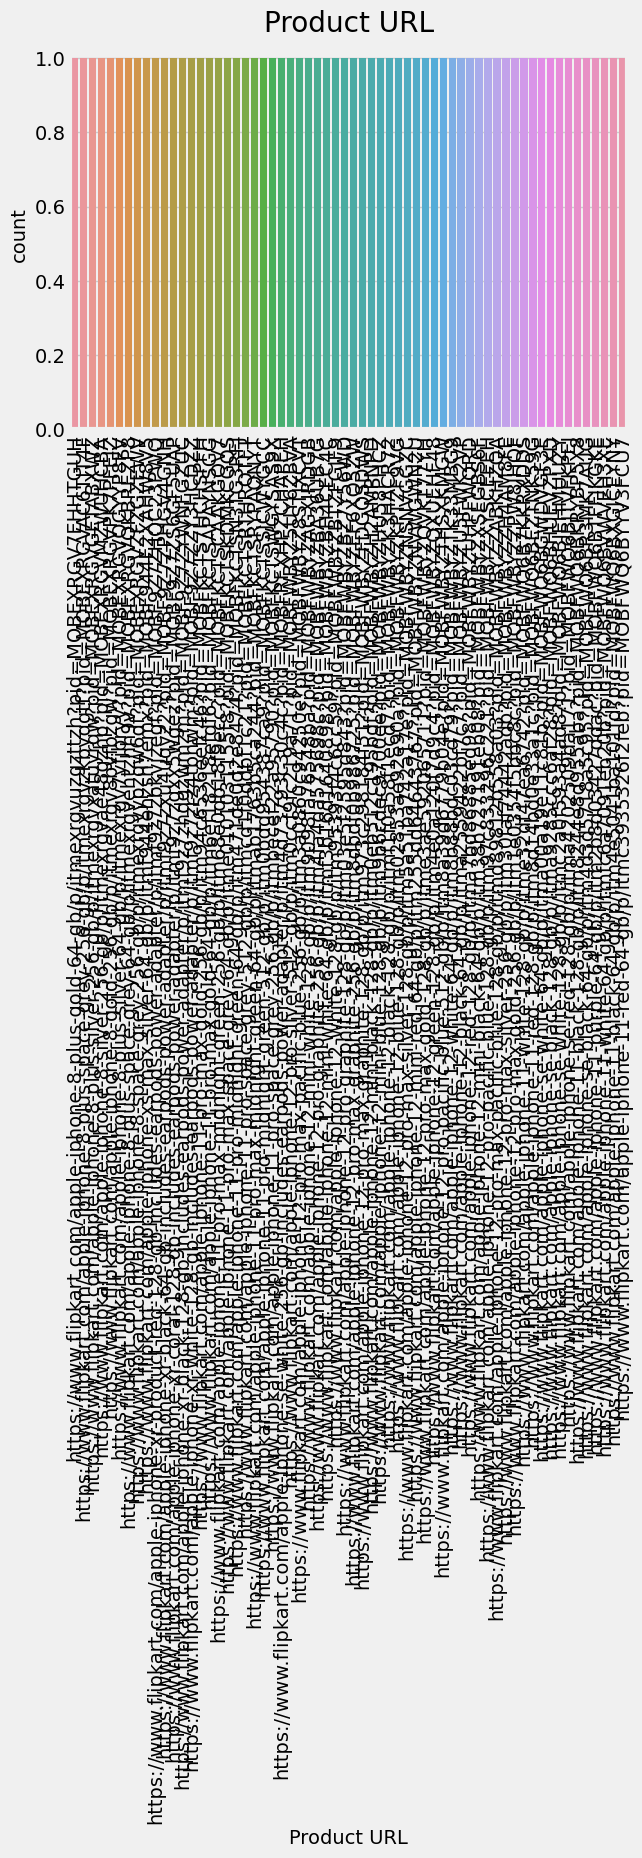

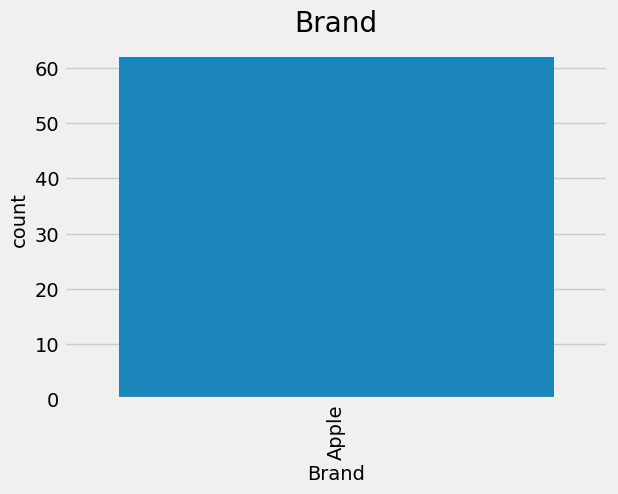

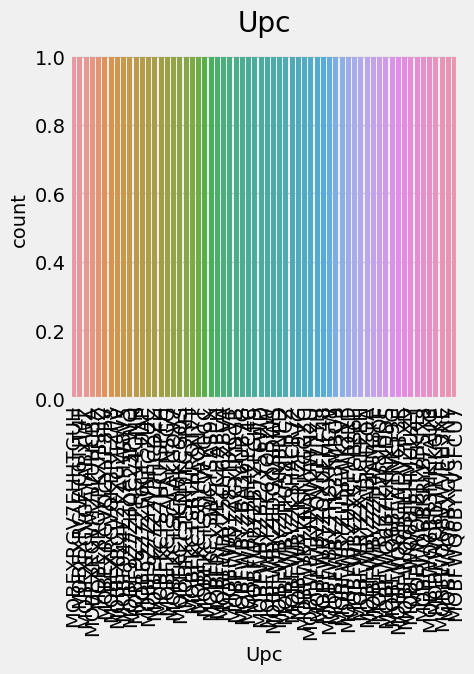

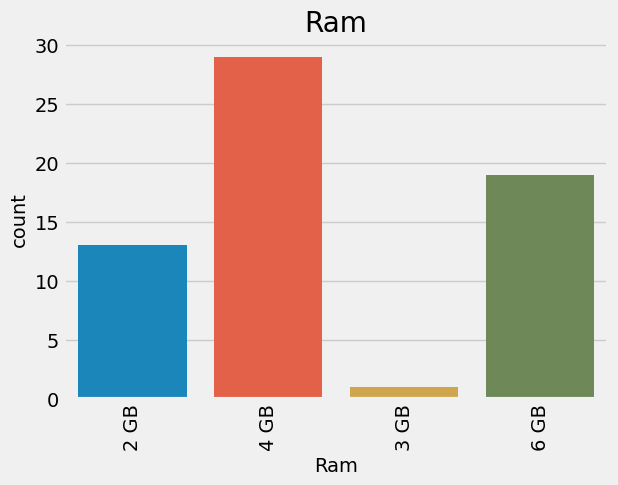

In [21]:
for i in cat_col:
    fig, ax = plt.subplots()
    sns.countplot(x=i, data=df)
    ax.set_title(i)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

In [24]:
Mutli_impute_df = df.copy()

In [25]:
knn_impute = KNNImputer(n_neighbors=3)
imputed_data = knn_impute.fit_transform(Mutli_impute_df)
imputed_data

array([[4.5000e+01, 4.3000e+01, 0.0000e+00, 4.9900e+04, 4.9900e+04,
        0.0000e+00, 3.4310e+03, 3.5600e+02, 0.0000e+00, 4.6000e+00,
        0.0000e+00],
       [4.8000e+01, 4.6000e+01, 0.0000e+00, 8.4900e+04, 8.4900e+04,
        0.0000e+00, 3.4310e+03, 3.5600e+02, 1.0000e+00, 4.6000e+00,
        0.0000e+00],
       [4.6000e+01, 4.4000e+01, 0.0000e+00, 8.4900e+04, 8.4900e+04,
        0.0000e+00, 3.4310e+03, 3.5600e+02, 2.0000e+00, 4.6000e+00,
        0.0000e+00],
       [4.3000e+01, 4.8000e+01, 0.0000e+00, 7.7000e+04, 7.7000e+04,
        0.0000e+00, 1.1202e+04, 7.9400e+02, 3.0000e+00, 4.5000e+00,
        0.0000e+00],
       [4.2000e+01, 4.2000e+01, 0.0000e+00, 7.7000e+04, 7.7000e+04,
        0.0000e+00, 1.1202e+04, 7.9400e+02, 4.0000e+00, 4.5000e+00,
        0.0000e+00],
       [4.7000e+01, 4.5000e+01, 0.0000e+00, 4.9900e+04, 4.9900e+04,
        0.0000e+00, 3.4310e+03, 3.5600e+02, 5.0000e+00, 4.6000e+00,
        0.0000e+00],
       [4.9000e+01, 4.7000e+01, 0.0000e+00, 4.9900e+04, 4.

In [26]:
Mutli_impute_df = pd.DataFrame(imputed_data, columns=knn_impute.feature_names_in_)

In [27]:
Mutli_impute_df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,45.0,43.0,0.0,49900.0,49900.0,0.0,3431.0,356.0,0.0,4.6,0.0
1,48.0,46.0,0.0,84900.0,84900.0,0.0,3431.0,356.0,1.0,4.6,0.0
2,46.0,44.0,0.0,84900.0,84900.0,0.0,3431.0,356.0,2.0,4.6,0.0
3,43.0,48.0,0.0,77000.0,77000.0,0.0,11202.0,794.0,3.0,4.5,0.0
4,42.0,42.0,0.0,77000.0,77000.0,0.0,11202.0,794.0,4.0,4.5,0.0


In [29]:
Mutli_impute_df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [30]:
new_df = Mutli_impute_df.copy()

In [31]:

def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit

# this function will delete any outliers upper or lower the limit
def outliers_del(column_name):
    # we will make new_df global to consider the global variable not the local
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", df.shape)
    print("the new data shape is :", new_df.shape)
    
    
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")
        
        
        
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")
        
        
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(x=new_df[column_name])
    plt.subplot(2,2,2)
    sns.boxplot(x=df[column_name])
    plt.show()

    

In [32]:
new_df.columns

Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

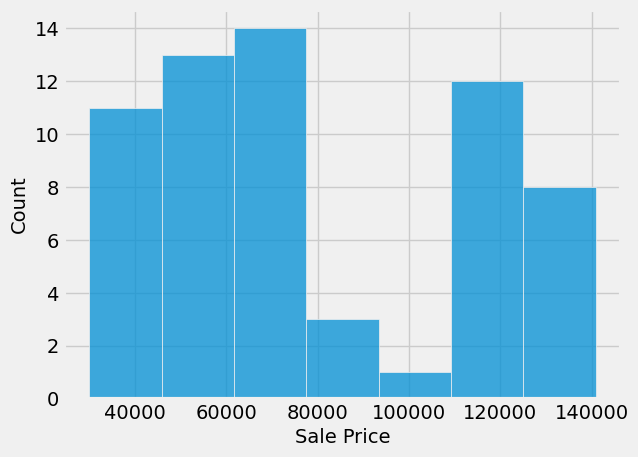

In [33]:
sns.histplot(new_df['Sale Price'])
plt.show()

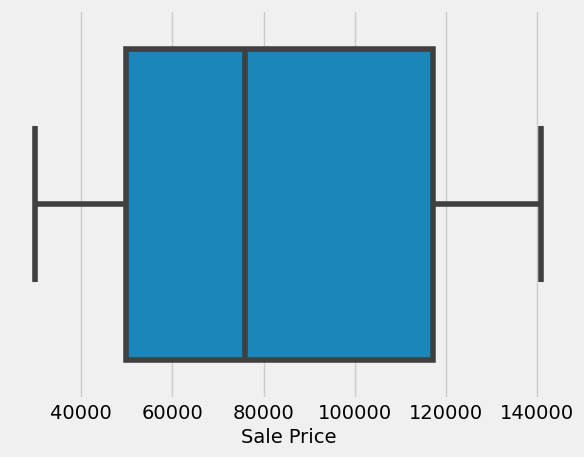

In [34]:
sns.boxplot(x=new_df['Sale Price'])
plt.show()

the old data shape is : (62, 11)
the new data shape is : (62, 11)


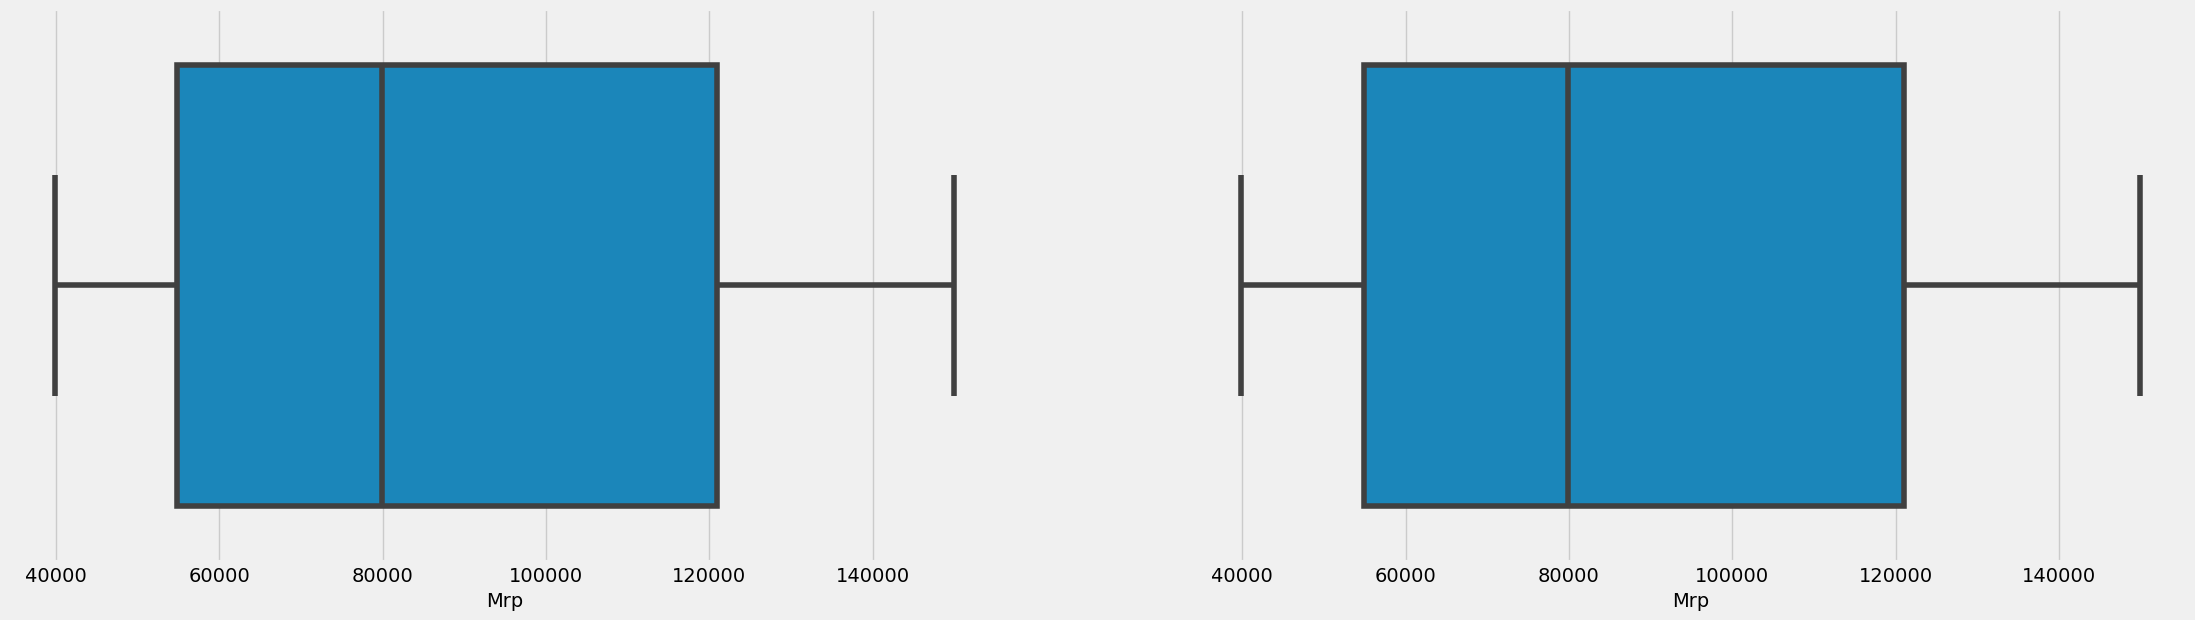

In [36]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Mrp')
outliers_del('Mrp')
outlier_compare('Mrp')

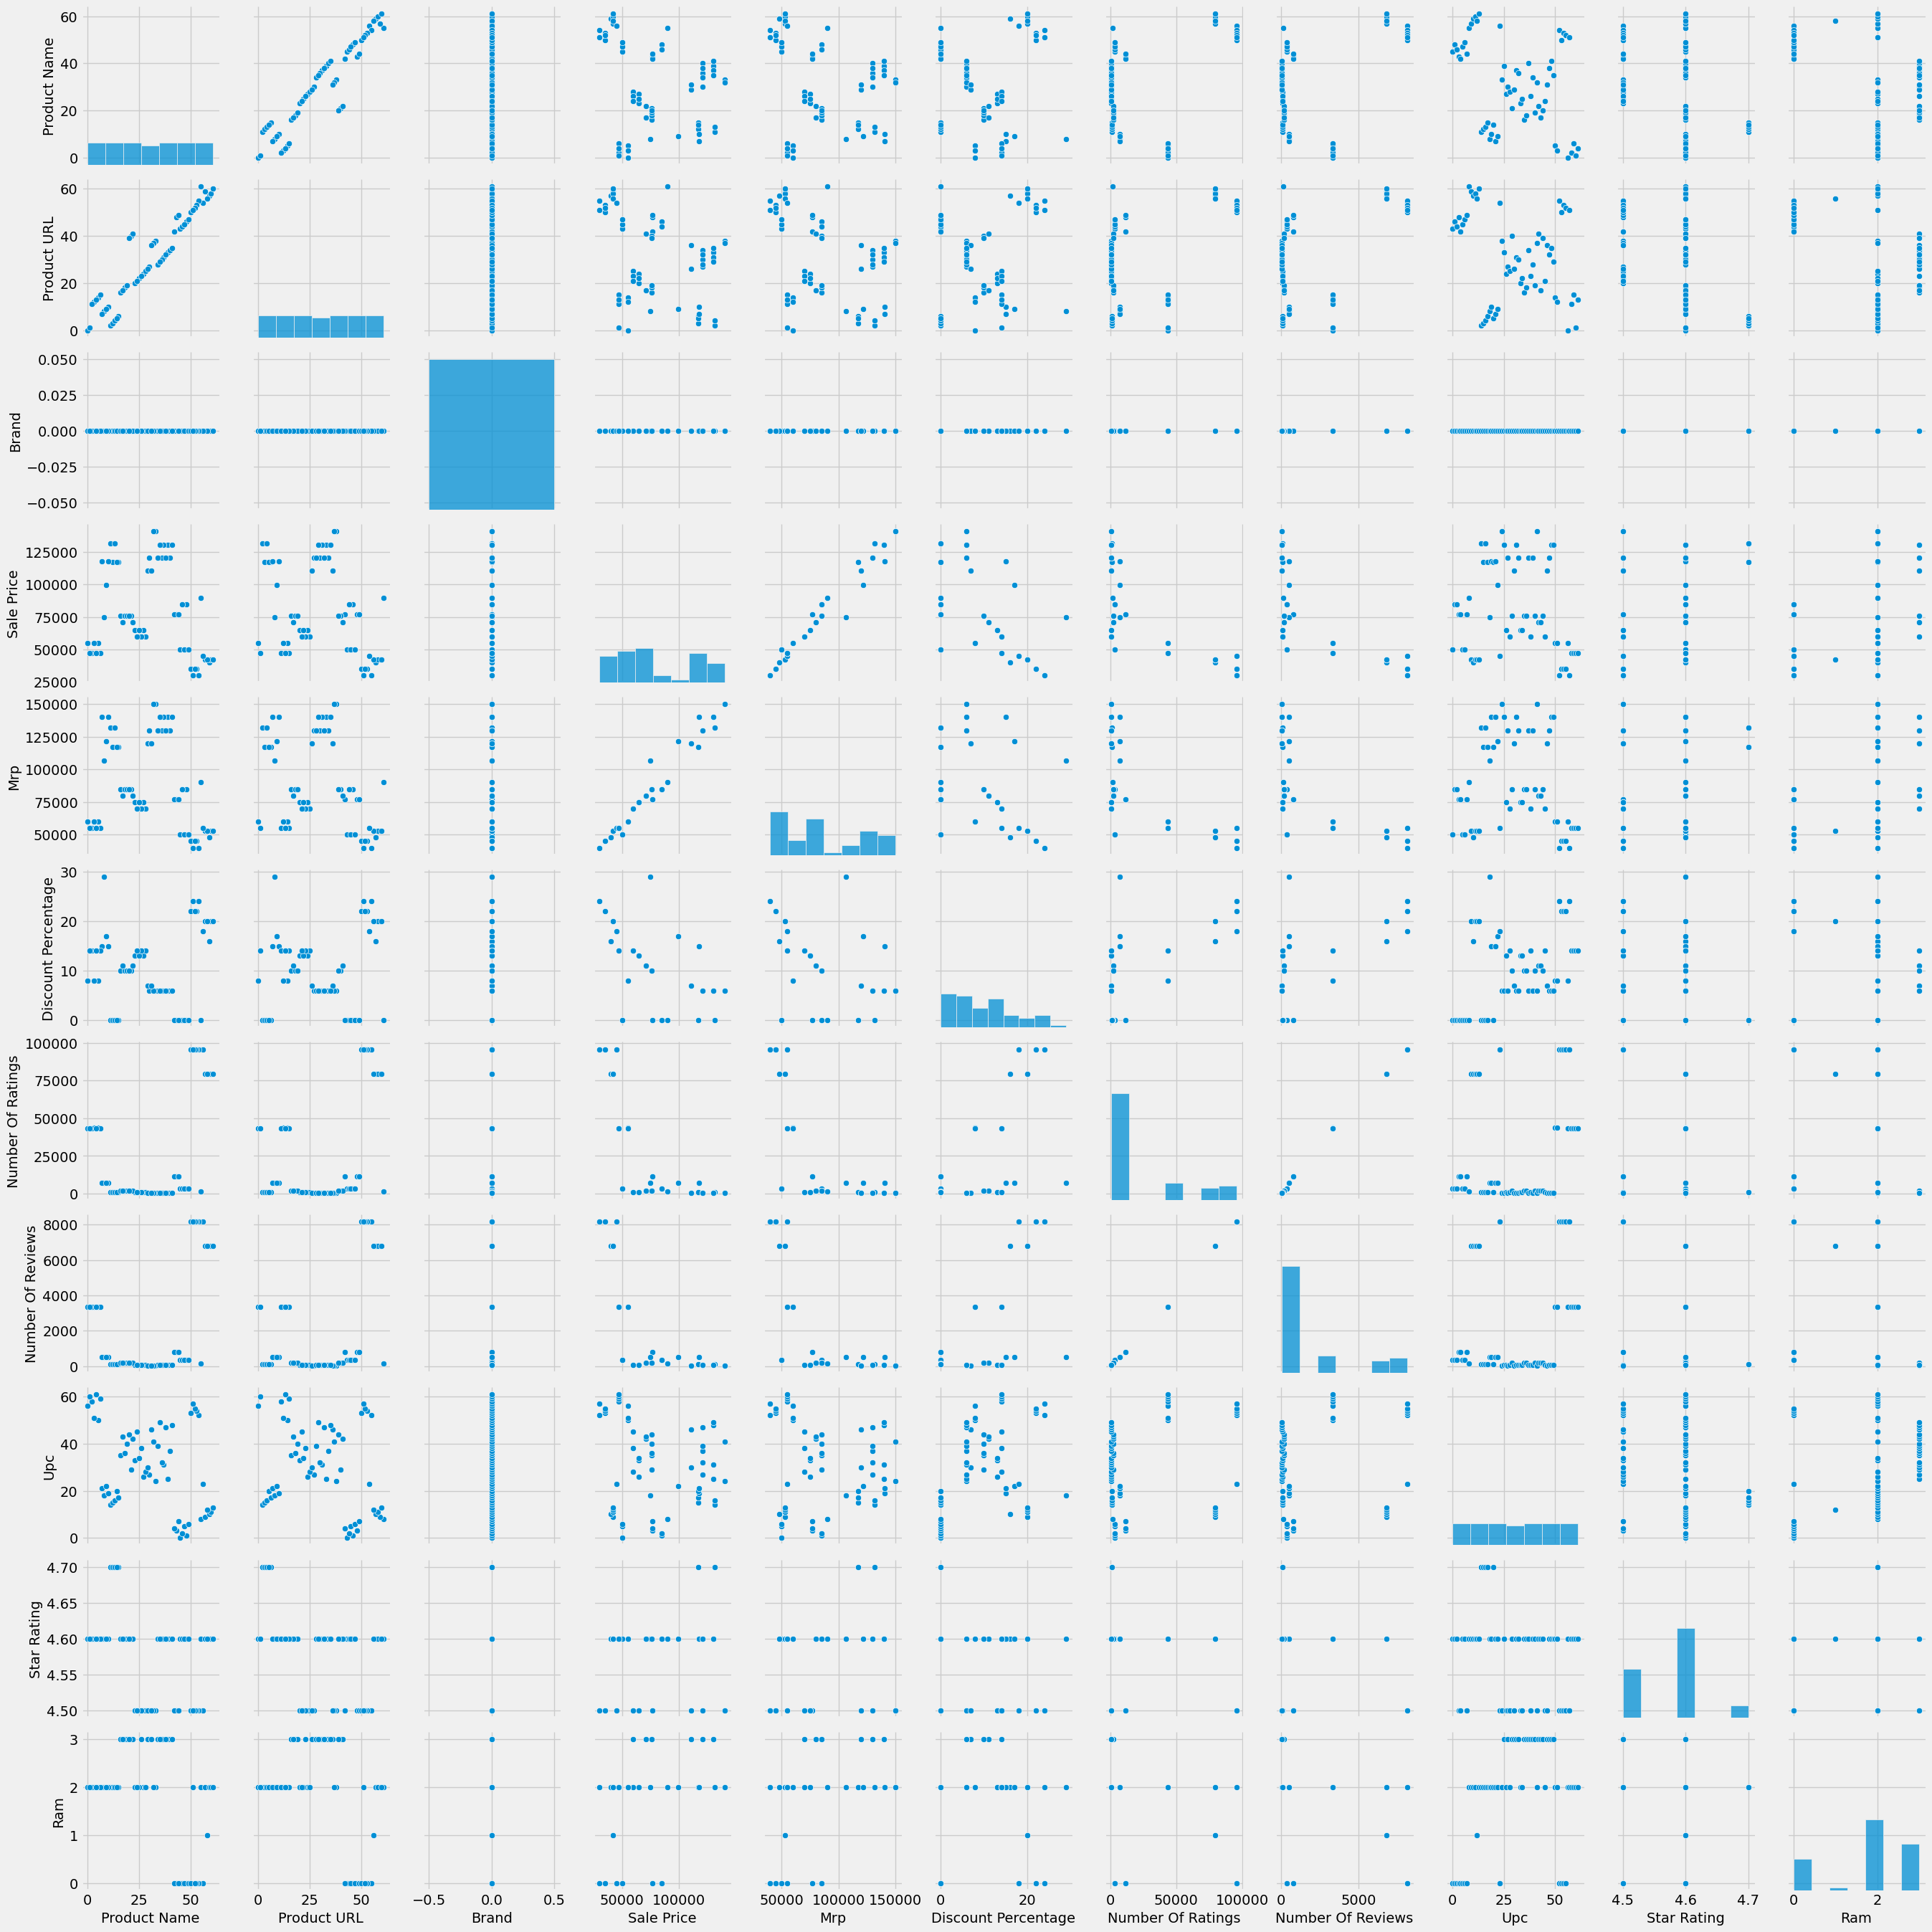

In [38]:
sns.pairplot(new_df)
plt.show()

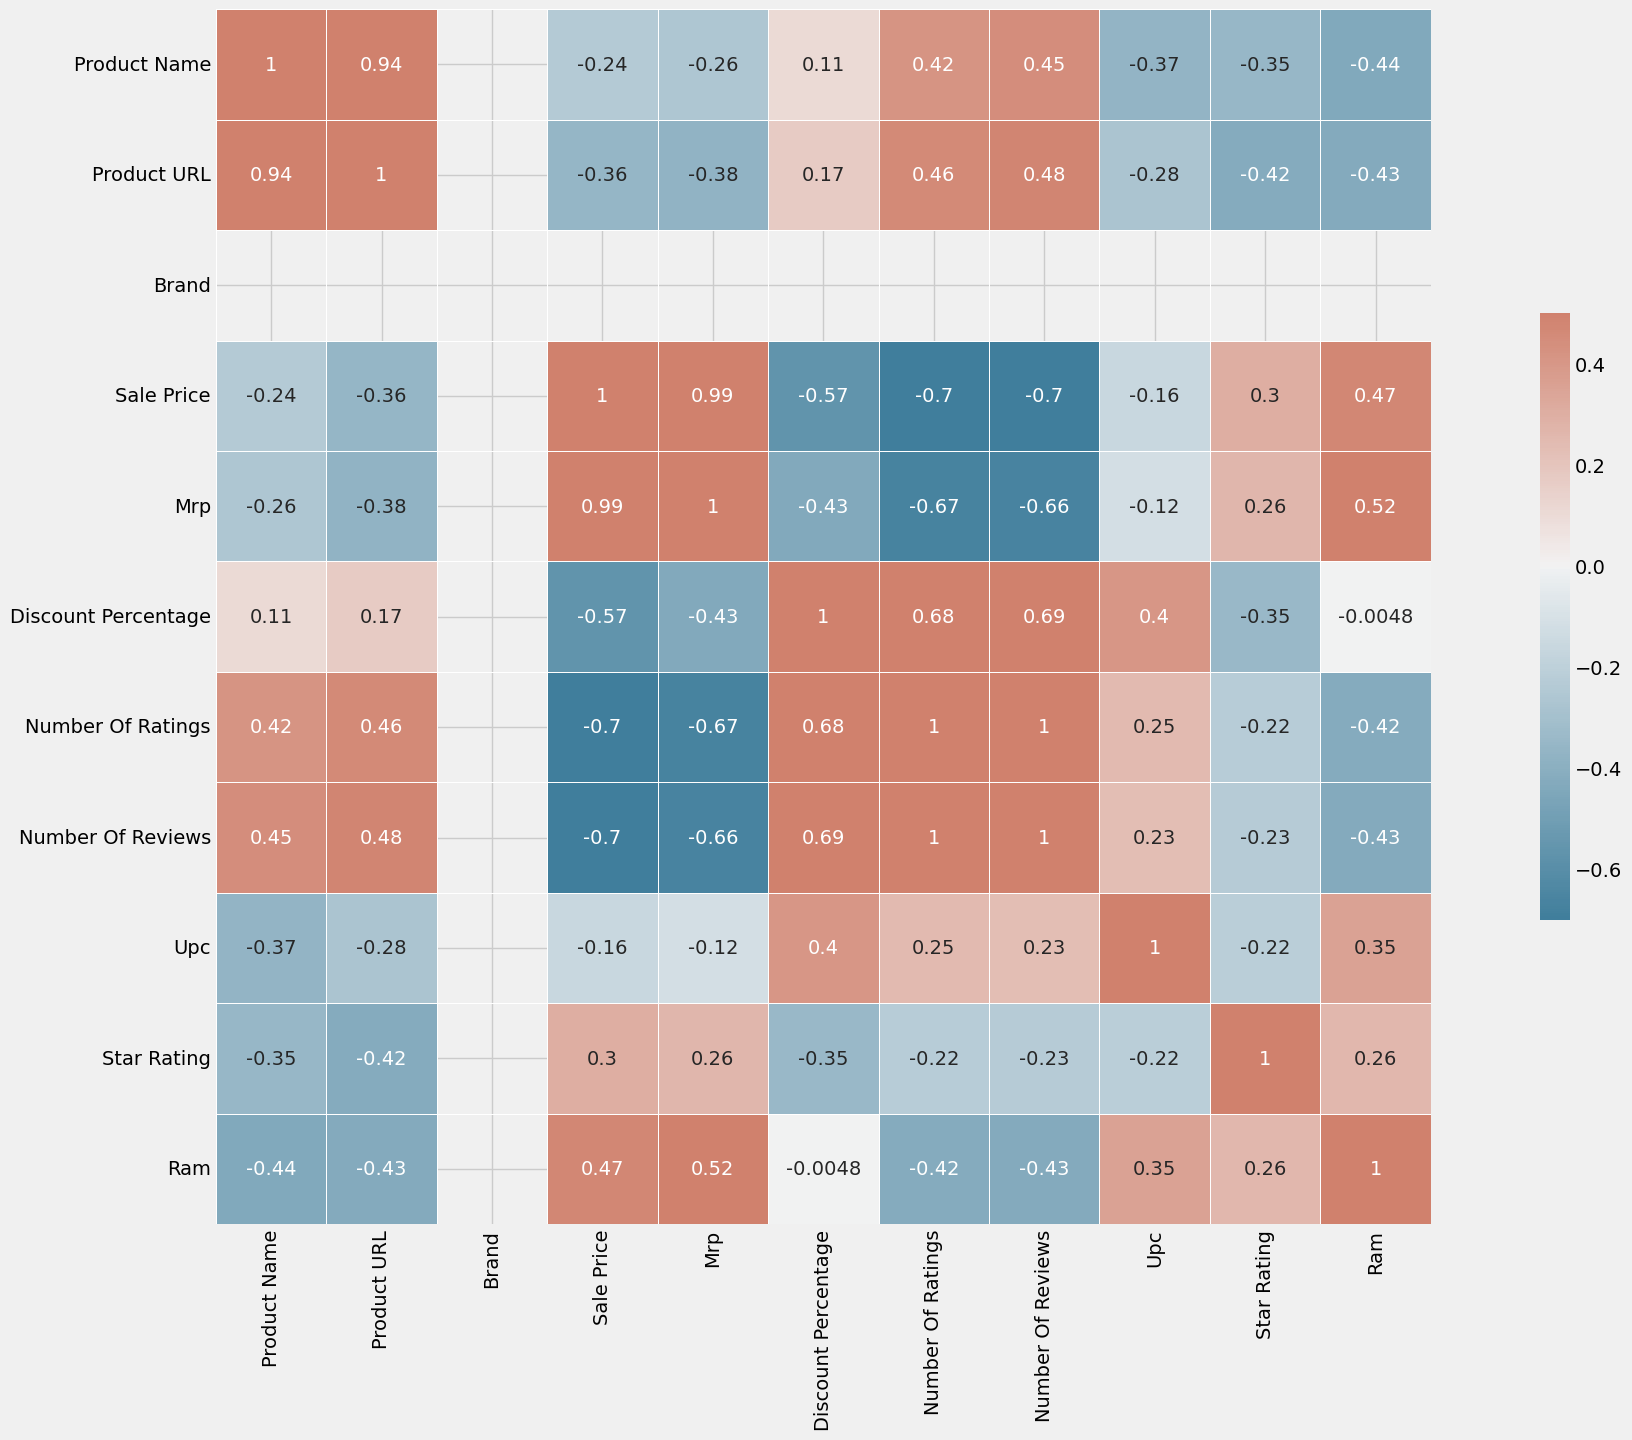

In [39]:
corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.5, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [40]:
normalizer = MinMaxScaler(feature_range=(0,1))
data = normalizer.fit_transform(new_df)
scaled_df = pd.DataFrame(data, columns=new_df.columns)
scaled_df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,0.737705,0.704918,0.0,0.179448,0.090909,0.0,0.030293,0.038675,0.000000,0.5,0.0
1,0.786885,0.754098,0.0,0.495045,0.409091,0.0,0.030293,0.038675,0.016393,0.5,0.0
2,0.754098,0.721311,0.0,0.495045,0.409091,0.0,0.030293,0.038675,0.032787,0.5,0.0
3,0.704918,0.786885,0.0,0.423810,0.337273,0.0,0.111779,0.092622,0.049180,0.0,0.0
4,0.688525,0.688525,0.0,0.423810,0.337273,0.0,0.111779,0.092622,0.065574,0.0,0.0


In [41]:
X = new_df.drop('Sale Price', axis=1)
y = new_df['Sale Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [44]:
ols.coef_, ols.intercept_

(array([ 2.54525502e+01, -2.30338568e+01, -2.72891043e-10,  9.12465244e-01,
        -9.85006482e+02, -4.44068504e-01,  6.09824368e+00,  4.06973997e+01,
        -9.64457991e+03,  6.05055225e+02]),
 49565.79300246261)

In [45]:
ols.score(X_train, y_train)

0.9987721615536579

In [46]:
y_pred = ols.predict(X_test)

In [47]:
mean_squared_error(y_test, y_pred)

6093239.070788087

In [48]:
mean_absolute_error(y_test, y_pred)

1869.6099279796777

In [49]:
ols.score(X_test, y_test)

0.9950237207670797

In [51]:
X_scaled = scaled_df.drop('Sale Price', axis=1)
y_scaled = scaled_df['Sale Price']
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X, y)

In [52]:
ols = LinearRegression()
ols.fit(X_scaled_train, y_scaled_train)
ols.score(X_scaled_train, y_scaled_train)

0.9986859381008829

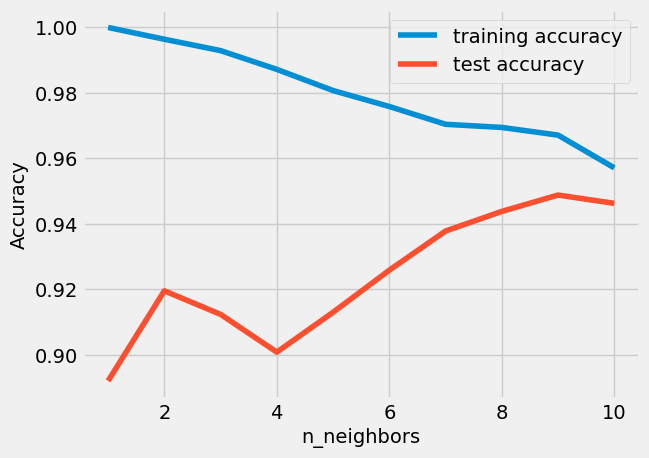

In [56]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [57]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3739.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           8.09e-70
Time:                        21:50:46   Log-Likelihood:                -534.26
No. Observations:                  62   AIC:                             1089.
Df Residuals:                      52   BIC:                             1110.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.846e+04   2

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
vif_data

C:\Users\POP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,Product Name,64.766299
1,Product URL,43.923633
2,Brand,NaN
3,Mrp,18.570590
4,Discount Percentage,7.744974
5,Number Of Ratings,2360.519614
6,Number Of Reviews,2420.848000
7,Upc,7.795387
8,Star Rating,37.090473
9,Ram,9.165950
